In [1]:
!pip install qiskit
!pip install qiskit[visualization]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 48.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 32.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=2db28befb601d38bccec01205e31313857cdcac732ae9167c1e48d05074f78d2
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [2]:
from matplotlib.pyplot import *

In [3]:
from qiskit import QuantumCircuit
from qiskit import QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import circuit_drawer

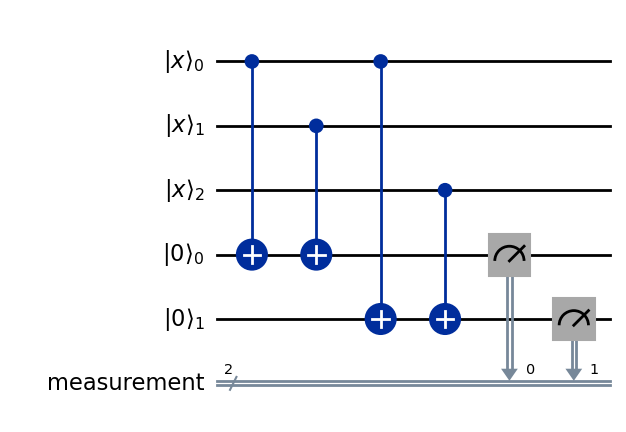

In [5]:
cbits = ClassicalRegister(2, 'measurement')  
alice_qubit= QuantumRegister(3, '|x⟩')
bob_qubit= QuantumRegister(1, 'bob__qubit')
lq1= QuantumRegister(2, 'ancilla_qubit_alice')
syn= QuantumRegister(2, '|0⟩')
                                            
syndrome_qc= QuantumCircuit(alice_qubit,syn,cbits)

syndrome_qc.cx(0,3)
syndrome_qc.cx(1,3)
syndrome_qc.cx(0,4)
syndrome_qc.cx(2,4)
syndrome_qc.measure(syn, cbits)

syndrome_qc.draw(output='mpl')

In [6]:
syndrome_qc.draw('mpl').savefig("Syndrome measurement.png",dpi=400,bbox_inches="tight")

<ipython-input-7-5d854f6aefa0>:24: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  threebit_single_qc.x(2).c_if(cbits, 1)  # Apply X to 3rd qubit if syndrome = 01
<ipython-input-7-5d854f6aefa0>:25: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  threebit_single_qc.x(1).c_if(cbits, 2)  # Apply X to 2nd qubit if syndrome = 10
<ipython-input-7-5d854f6aefa0>:26: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  threebit_single_qc.x(0).c_if(cbits, 3)  # Apply X to 1st qubit if syndrome = 11


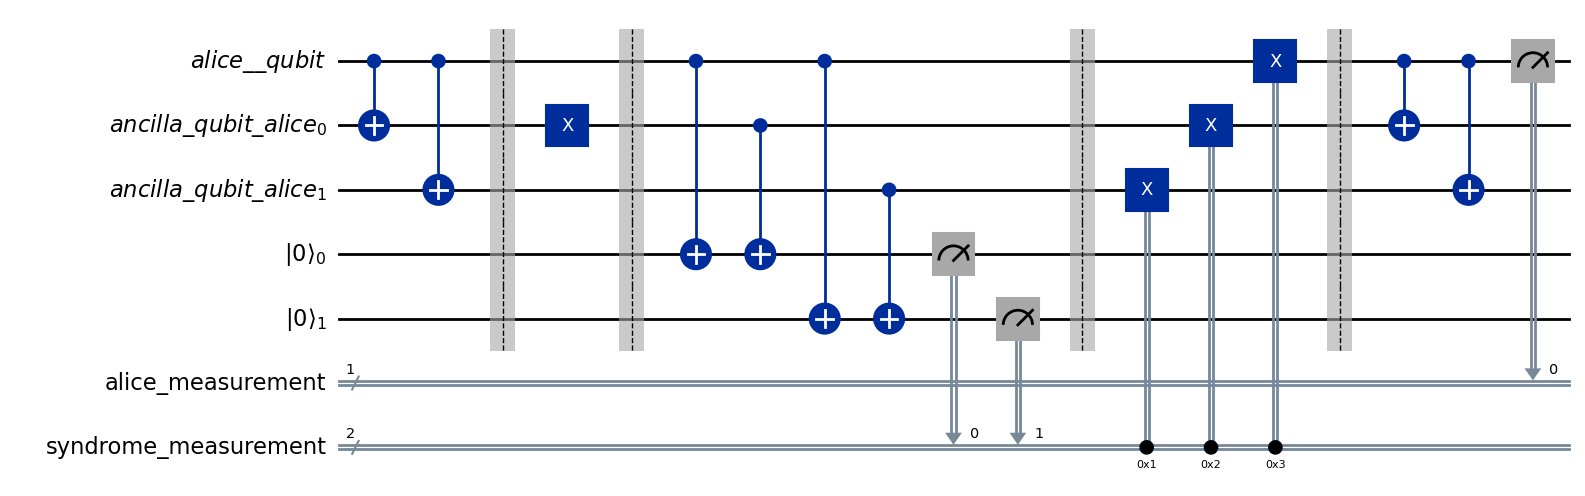

In [7]:
cr= ClassicalRegister(1,"alice_measurement")
cbits = ClassicalRegister(2, 'syndrome_measurement')  
alice_qubit= QuantumRegister(1, 'alice__qubit')
bob_qubit= QuantumRegister(1, 'bob__qubit')
lq1= QuantumRegister(2, 'ancilla_qubit_alice')
syn= QuantumRegister(2, '|0⟩')
                                            
threebit_single_qc= QuantumCircuit(alice_qubit,lq1,syn,cr, cbits)
                                            
# threebit_single_qc.barrier()
threebit_single_qc.cx(alice_qubit, lq1)
                                            
threebit_single_qc.barrier()

threebit_single_qc.x([1])
threebit_single_qc.barrier()
threebit_single_qc.cx(0,3)
threebit_single_qc.cx(1,3)
threebit_single_qc.cx(0,4)
threebit_single_qc.cx(2,4)
threebit_single_qc.measure(syn, cbits)
threebit_single_qc.barrier()

threebit_single_qc.x(2).c_if(cbits, 1)  # Apply X to 3rd qubit if syndrome = 01
threebit_single_qc.x(1).c_if(cbits, 2)  # Apply X to 2nd qubit if syndrome = 10
threebit_single_qc.x(0).c_if(cbits, 3)  # Apply X to 1st qubit if syndrome = 11
threebit_single_qc.barrier()
threebit_single_qc.cx(alice_qubit, lq1)

#threebit_single_qc.mcx([1,2],0)

#threebit_single_qc.barrier()
threebit_single_qc.measure(alice_qubit[0],cr)
threebit_single_qc.draw(output='mpl')

In [8]:
threebit_single_qc.draw(output='mpl').savefig("3bit repetition on a single state.png",dpi=400,bbox_inches="tight")

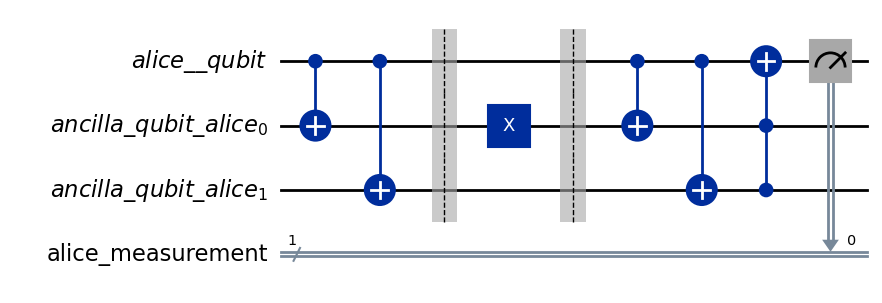

In [9]:
cr= ClassicalRegister(1,"alice_measurement")
alice_qubit= QuantumRegister(1, 'alice__qubit')
bob_qubit= QuantumRegister(1, 'bob__qubit')
lq1= QuantumRegister(2, 'ancilla_qubit_alice')
lq2= QuantumRegister(2)
                                            
threebit_single_qc= QuantumCircuit(alice_qubit,lq1,cr)
                                            
# threebit_single_qc.barrier()
threebit_single_qc.cx(alice_qubit, lq1)
                                            
threebit_single_qc.barrier()

threebit_single_qc.x([1])
threebit_single_qc.barrier()
threebit_single_qc.cx(alice_qubit, lq1)

threebit_single_qc.mcx([1,2],0)

#threebit_single_qc.barrier()
threebit_single_qc.measure(alice_qubit[0],cr)
threebit_single_qc.draw(output='mpl')

In [10]:
threebit_single_qc.draw(output='mpl').savefig("3bit repetition on a single state(simplified).png",dpi=400,bbox_inches="tight")

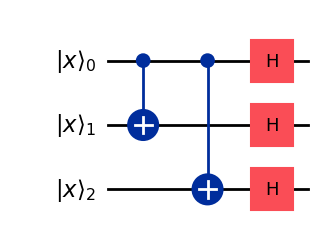

In [11]:
alice_qubit= QuantumRegister(3, '|x⟩')

encoding_qc= QuantumCircuit(alice_qubit)

encoding_qc.cx(0,1)
encoding_qc.cx(0,2)
encoding_qc.h([0,1,2])

encoding_qc.draw(output='mpl')

In [12]:
encoding_qc.draw(output='mpl').savefig("3bit phase-flip encoder.png",dpi=400,bbox_inches="tight")

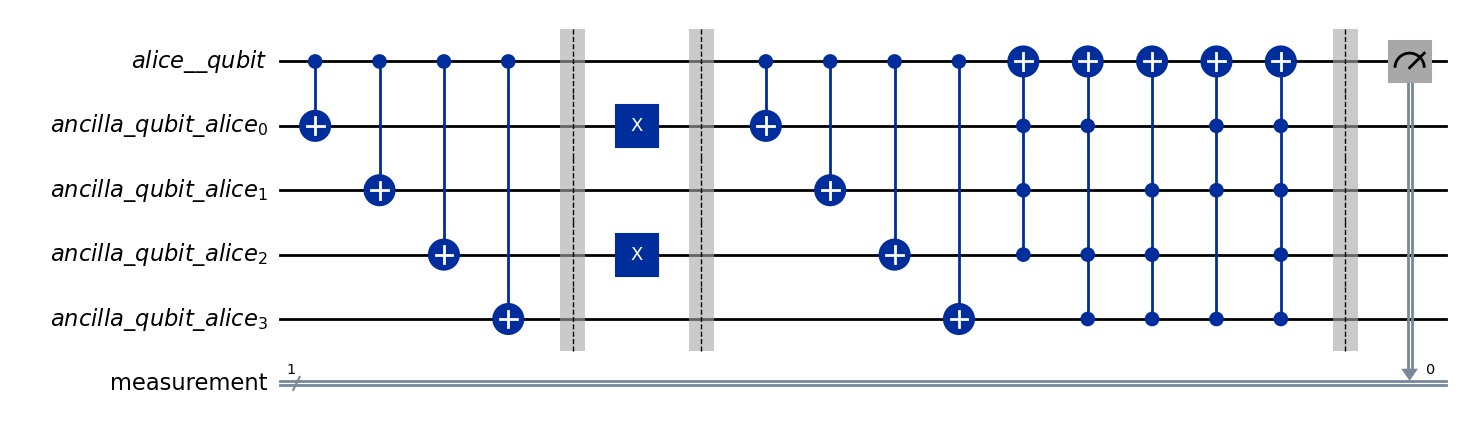

In [13]:
cr= ClassicalRegister(1,"measurement")
alice_qubit= QuantumRegister(1, 'alice__qubit')
bob_qubit= QuantumRegister(1, 'bob__qubit')
lq1= QuantumRegister(4, 'ancilla_qubit_alice')
lq2= QuantumRegister(4,'ancilla_qubit_bob')

fivebit_single_qc= QuantumCircuit(alice_qubit,lq1,cr)

fivebit_single_qc.cx(alice_qubit, lq1)

fivebit_single_qc.barrier()

fivebit_single_qc.x([1,3])
fivebit_single_qc.barrier()

fivebit_single_qc.cx(alice_qubit, lq1)
fivebit_single_qc.mcx([1,2,3],0)
fivebit_single_qc.mcx([1,3,4],0)
fivebit_single_qc.mcx([2,3,4],0)
fivebit_single_qc.mcx([1,2,4],0)
fivebit_single_qc.mcx([1,2,3,4],0)

fivebit_single_qc.barrier()
fivebit_single_qc.measure(alice_qubit[0],cr)
fivebit_single_qc.draw(output='mpl')

In [14]:
fivebit_single_qc.draw(output='mpl').savefig("5bit repetition on single state.png",dpi=400,bbox_inches="tight")

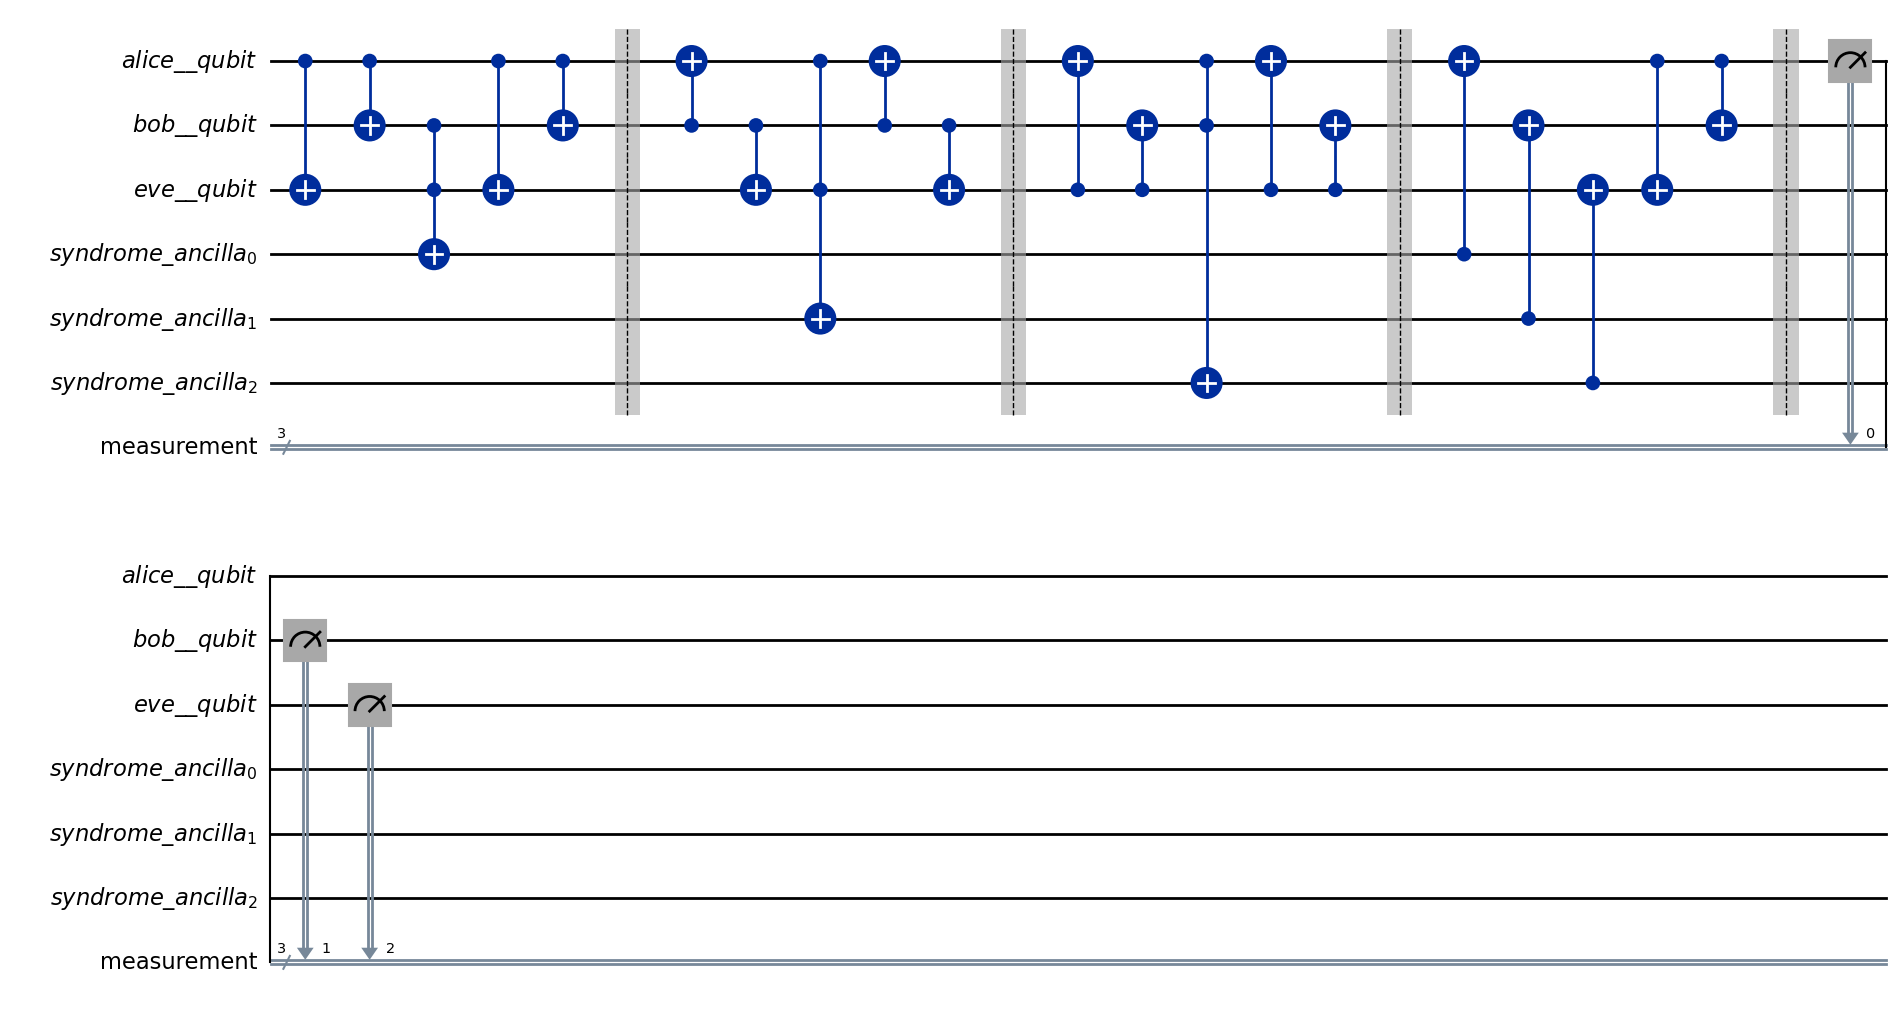

In [15]:
cr= ClassicalRegister(3,"measurement")
alice= QuantumRegister(1, 'alice__qubit')
bob= QuantumRegister(1, 'bob__qubit')
eve= QuantumRegister(1, 'eve__qubit')
aq1= QuantumRegister(2, 'ancilla_qubit_alice')
aq2= QuantumRegister(2,'ancilla_qubit_bob')
aq3= QuantumRegister(2,'ancilla_qubit_eve')
aq4= QuantumRegister(3,'syndrome_ancilla')

decoder = QuantumCircuit(alice,bob,eve,aq4,cr)

# decoder.h(alice)
# decoder.cx(alice,bob)
# decoder.cx(alice,eve)

# decoder.barrier()
# decoder.cx(alice, aq1)
# decoder.cx(bob, aq2)
# decoder.cx(eve, aq3)

# decoder.barrier()

# decoder.id(range(decoder.num_qubits-3))
# decoder.barrier()

# decoder.cx(alice, aq1)
# decoder.cx(bob, aq2)
# decoder.cx(eve, aq3)

# decoder.mcx([1,2],0)
# decoder.mcx([4,5],3)
# decoder.mcx([7,8],6)
# decoder.barrier()

decoder.cx(alice,eve)
decoder.cx(alice,bob)
decoder.ccx(bob, eve, aq4[0])
decoder.cx(alice,eve)
decoder.cx(alice,bob)
decoder.barrier()

decoder.cx(bob,alice)
decoder.cx(bob,eve)
decoder.ccx(alice, eve, aq4[1])
decoder.cx(bob,alice)
decoder.cx(bob,eve)
decoder.barrier()

decoder.cx(eve,alice)
decoder.cx(eve,bob)
decoder.ccx(alice, bob, aq4[2])
decoder.cx(eve,alice)
decoder.cx(eve,bob)
decoder.barrier()


decoder.cx(aq4[0],alice)
decoder.cx(aq4[1],bob)
decoder.cx(aq4[2],eve)
decoder.cx(alice,eve)
decoder.cx(alice,bob)
#decoder.h(alice)
decoder.barrier()

decoder.measure([alice[0], bob[0], eve[0]],cr)
decoder.draw(output='mpl')

In [16]:
decoder.draw(output='mpl').savefig("Decoder for modified 3bit QRC.png",dpi=400,bbox_inches="tight")

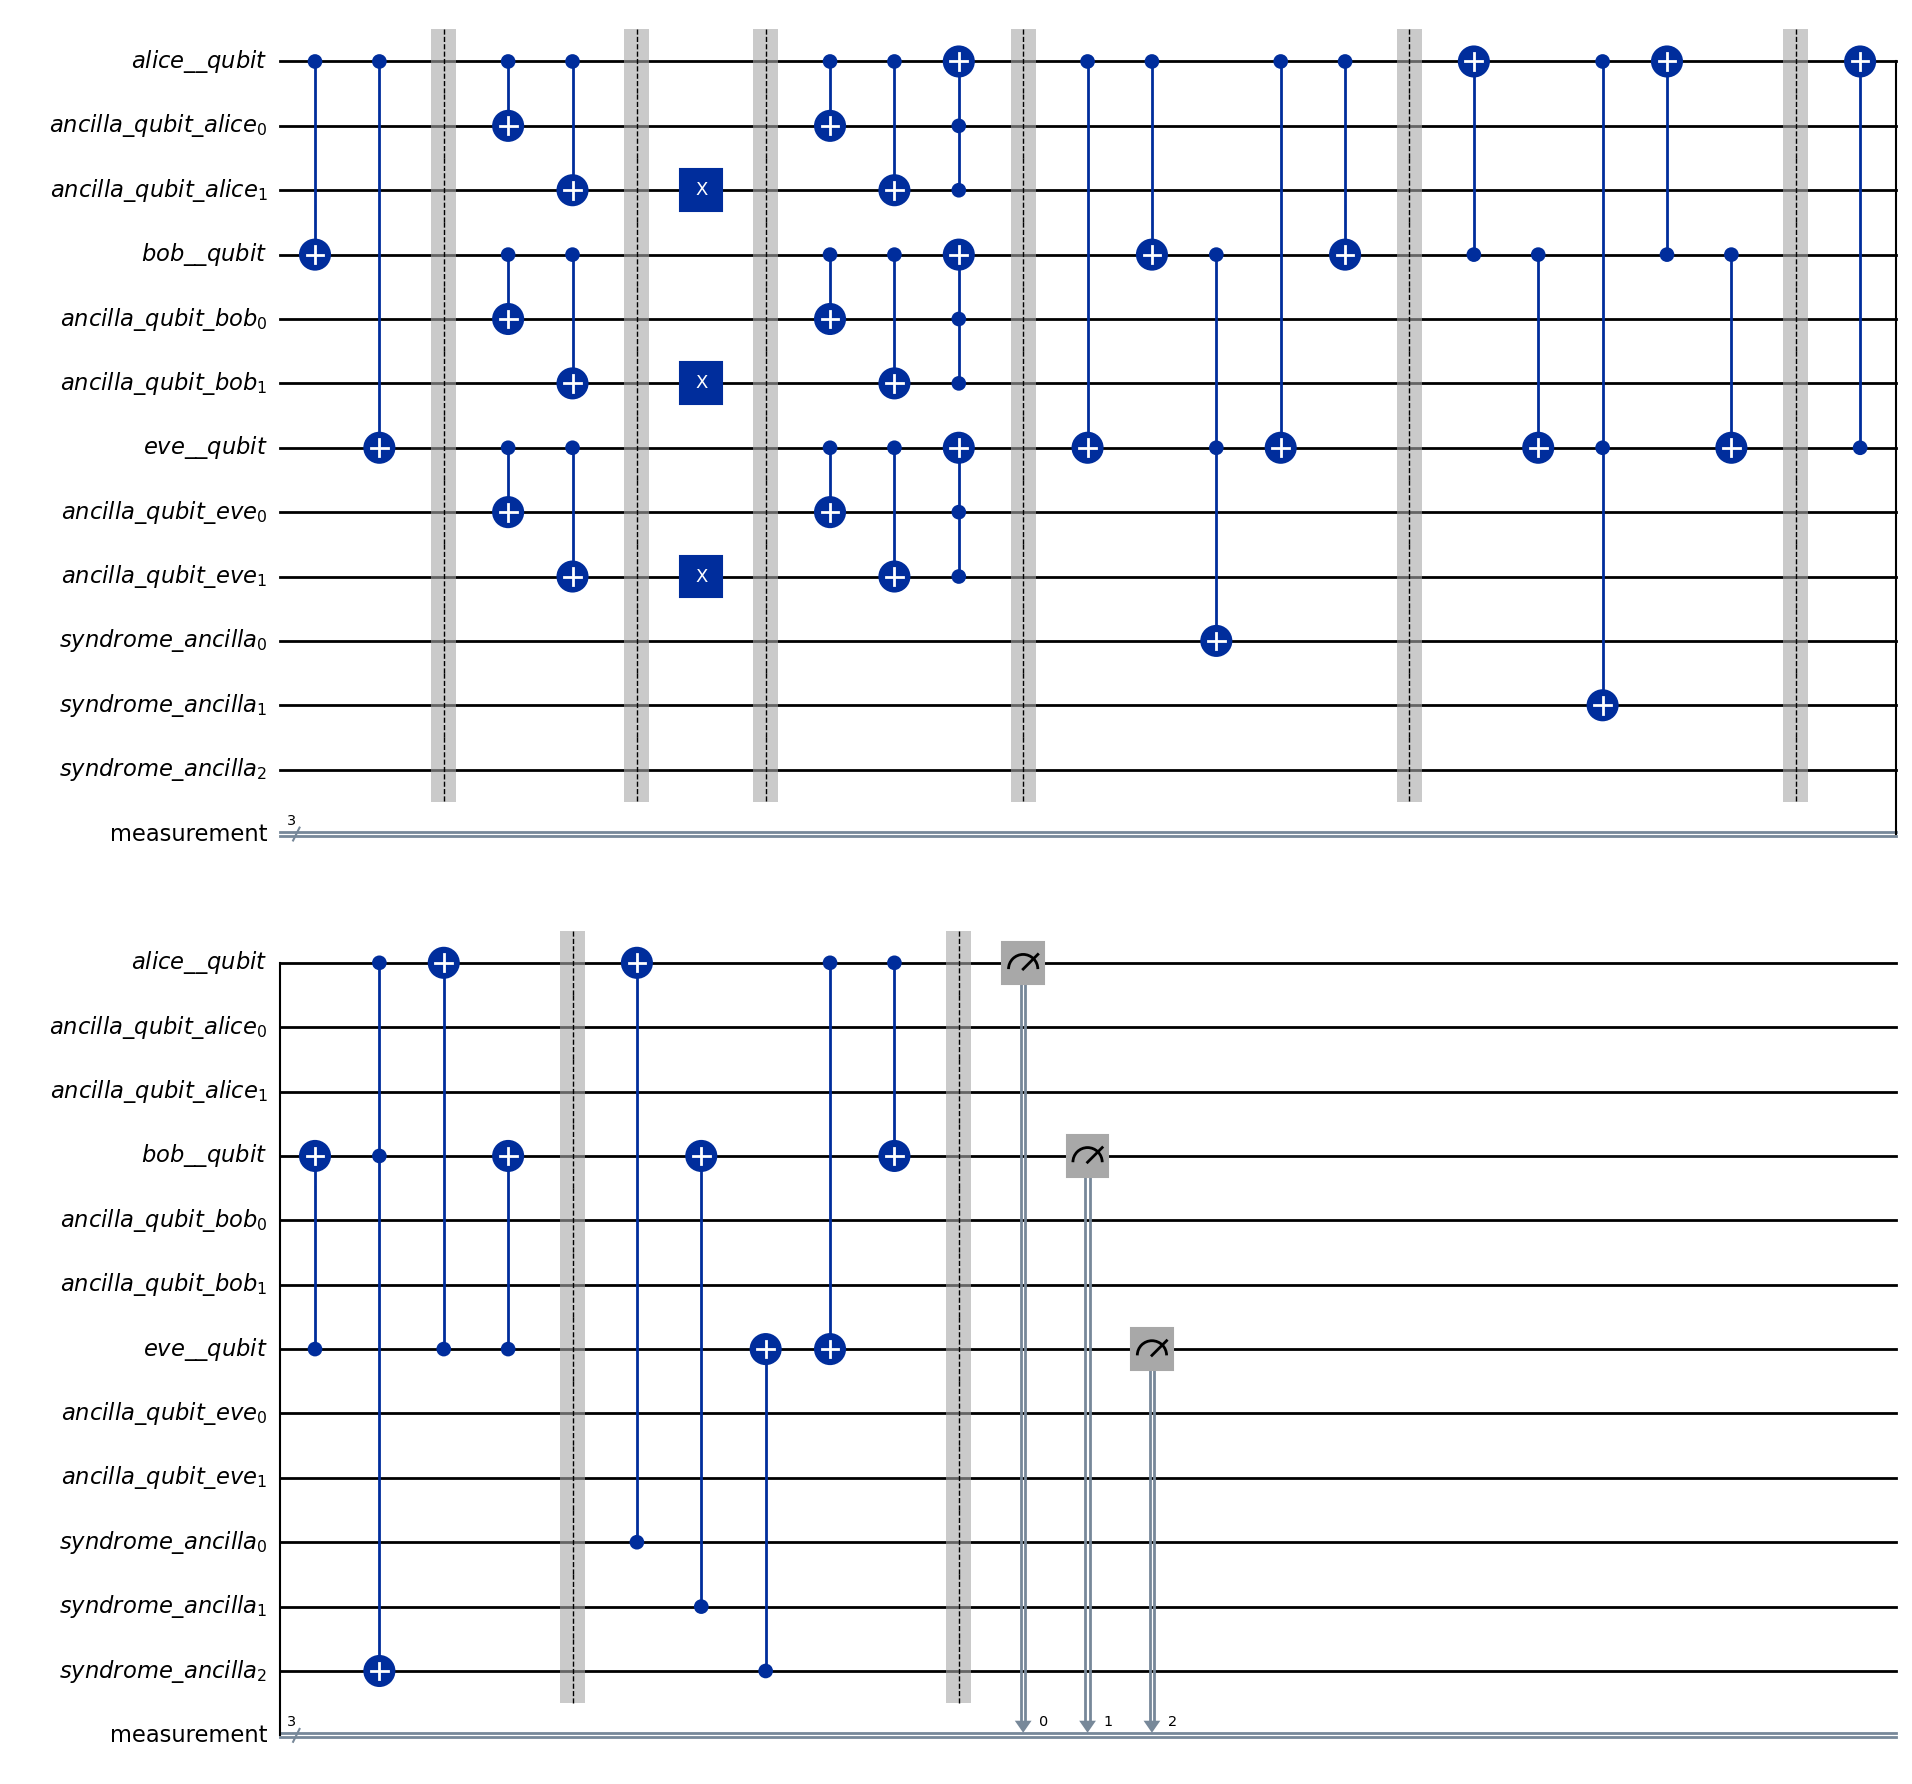

In [17]:
cr= ClassicalRegister(3,"measurement")
alice= QuantumRegister(1, 'alice__qubit')
bob= QuantumRegister(1, 'bob__qubit')
eve= QuantumRegister(1, 'eve__qubit')
aq1= QuantumRegister(2, 'ancilla_qubit_alice')
aq2= QuantumRegister(2,'ancilla_qubit_bob')
aq3= QuantumRegister(2,'ancilla_qubit_eve')
aq4= QuantumRegister(3,'syndrome_ancilla')

threebit_triple = QuantumCircuit(alice,aq1,bob,aq2,eve,aq3,aq4,cr)

#threebit_triple.h(alice)
threebit_triple.cx(alice,bob)
threebit_triple.cx(alice,eve)

threebit_triple.barrier()
threebit_triple.cx(alice, aq1)
threebit_triple.cx(bob, aq2)
threebit_triple.cx(eve, aq3)

threebit_triple.barrier()

threebit_triple.x([2,5,8])
threebit_triple.barrier()

threebit_triple.cx(alice, aq1)
threebit_triple.cx(bob, aq2)
threebit_triple.cx(eve, aq3)

threebit_triple.mcx([1,2],0)
threebit_triple.mcx([4,5],3)
threebit_triple.mcx([7,8],6)
threebit_triple.barrier()

threebit_triple.cx(alice,eve)
threebit_triple.cx(alice,bob)
threebit_triple.ccx(bob, eve, aq4[0])
threebit_triple.cx(alice,eve)
threebit_triple.cx(alice,bob)
threebit_triple.barrier()

threebit_triple.cx(bob,alice)
threebit_triple.cx(bob,eve)
threebit_triple.ccx(alice, eve, aq4[1])
threebit_triple.cx(bob,alice)
threebit_triple.cx(bob,eve)
threebit_triple.barrier()

threebit_triple.cx(eve,alice)
threebit_triple.cx(eve,bob)
threebit_triple.ccx(alice, bob, aq4[2])
threebit_triple.cx(eve,alice)
threebit_triple.cx(eve,bob)
threebit_triple.barrier()


threebit_triple.cx(aq4[0],alice)
threebit_triple.cx(aq4[1],bob)
threebit_triple.cx(aq4[2],eve)
threebit_triple.cx(alice,eve)
threebit_triple.cx(alice,bob)
#threebit_triple.h(alice)
threebit_triple.barrier()

threebit_triple.measure([alice[0], bob[0], eve[0]],cr)
threebit_triple.draw(output='mpl')

In [18]:
threebit_triple.draw(output='mpl').savefig("3bit repetition on triple state.pdf",dpi=400,bbox_inches="tight")

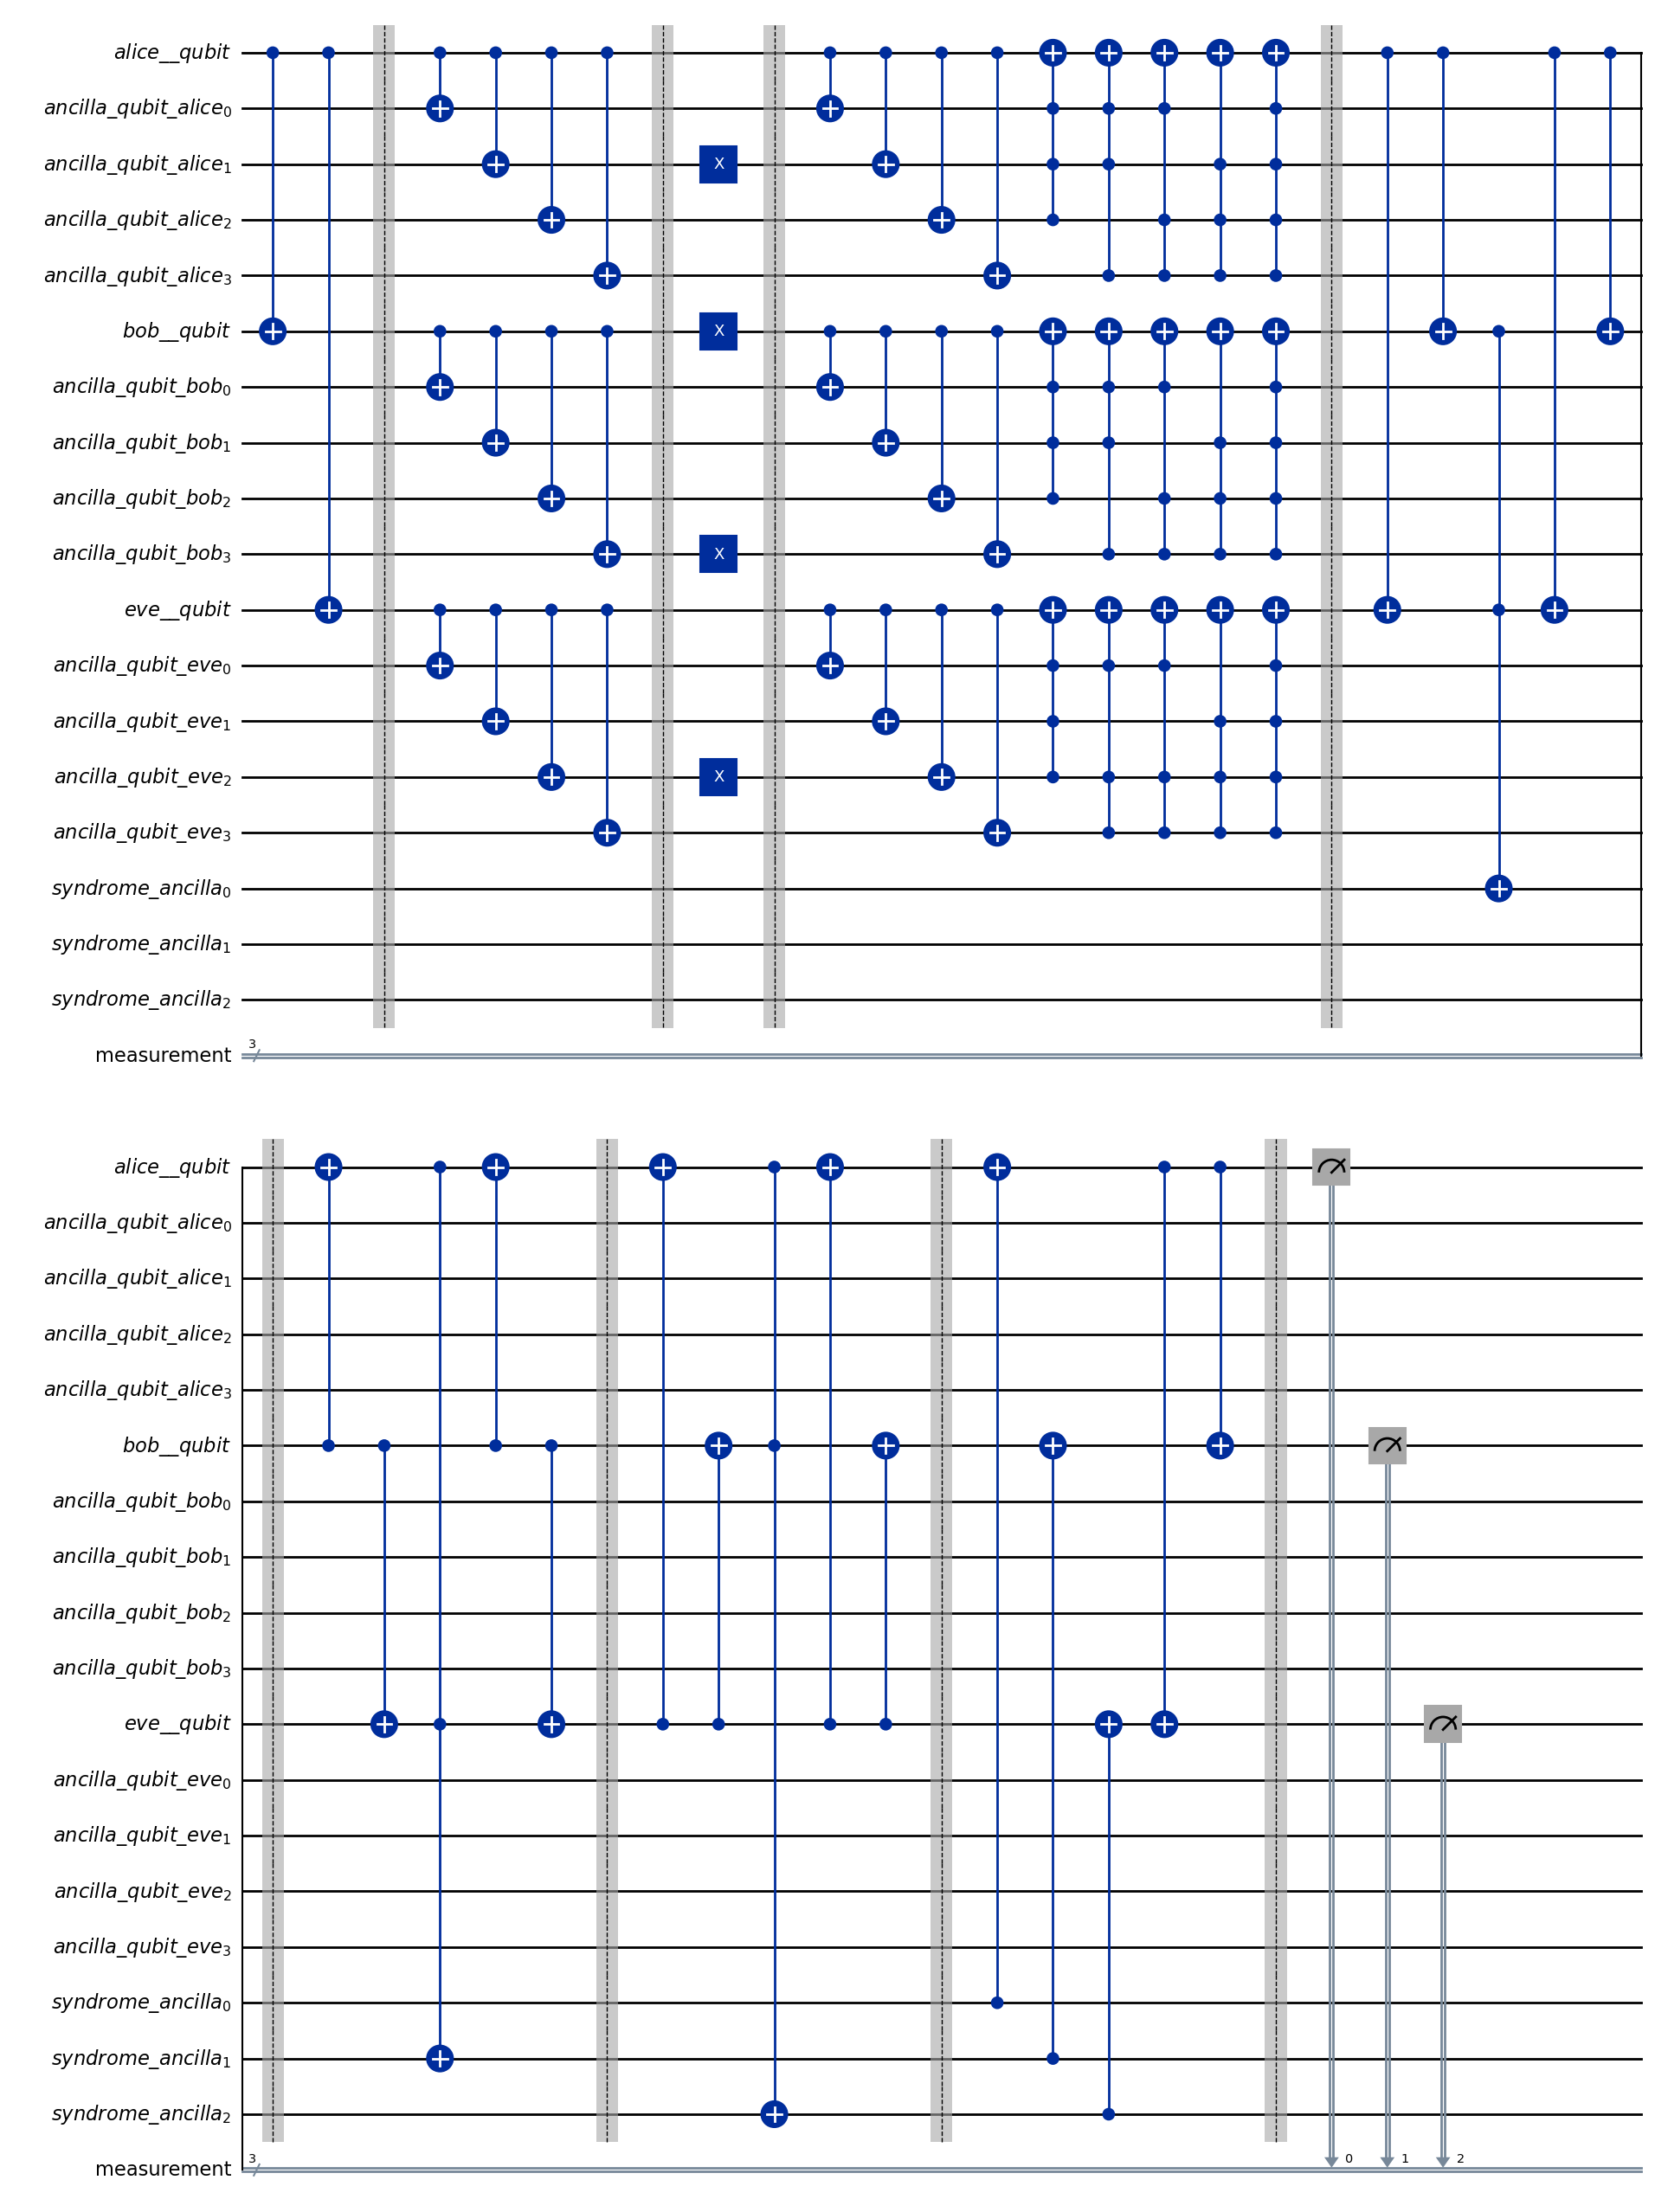

In [19]:
cr= ClassicalRegister(3,"measurement")
alice= QuantumRegister(1, 'alice__qubit')
bob= QuantumRegister(1, 'bob__qubit')
eve= QuantumRegister(1, 'eve__qubit')
aq1= QuantumRegister(4, 'ancilla_qubit_alice')
aq2= QuantumRegister(4,'ancilla_qubit_bob')
aq3= QuantumRegister(4,'ancilla_qubit_eve')
aq4= QuantumRegister(3,'syndrome_ancilla')

fivebit_triple = QuantumCircuit(alice,aq1,bob,aq2,eve,aq3,aq4,cr)

#fivebit_triple.h(alice)
fivebit_triple.cx(alice,bob)
fivebit_triple.cx(alice,eve)

fivebit_triple.barrier()
fivebit_triple.cx(alice, aq1)
fivebit_triple.cx(bob, aq2)
fivebit_triple.cx(eve, aq3)

fivebit_triple.barrier()

fivebit_triple.x([2,5,9,13])
fivebit_triple.barrier()

fivebit_triple.cx(alice, aq1)
fivebit_triple.cx(bob, aq2)
fivebit_triple.cx(eve, aq3)

fivebit_triple.mcx([1,2,3],0)
fivebit_triple.mcx([1,2,4],0)
fivebit_triple.mcx([1,3,4],0)
fivebit_triple.mcx([2,3,4],0)
fivebit_triple.mcx([1,2,3,4],0)
fivebit_triple.mcx([6,7,8],5)
fivebit_triple.mcx([6,7,9],5)
fivebit_triple.mcx([6,8,9],5)
fivebit_triple.mcx([7,8,9],5)
fivebit_triple.mcx([6,7,8,9],5)
fivebit_triple.mcx([11,12,13],10)
fivebit_triple.mcx([11,13,14],10)
fivebit_triple.mcx([11,13,14],10)
fivebit_triple.mcx([12,13,14],10)
fivebit_triple.mcx([11,12,13,14],10)
fivebit_triple.barrier()

fivebit_triple.cx(alice,eve)
fivebit_triple.cx(alice,bob)
fivebit_triple.ccx(bob, eve, aq4[0])
fivebit_triple.cx(alice,eve)
fivebit_triple.cx(alice,bob)
fivebit_triple.barrier()

fivebit_triple.cx(bob,alice)
fivebit_triple.cx(bob,eve)
fivebit_triple.ccx(alice, eve, aq4[1])
fivebit_triple.cx(bob,alice)
fivebit_triple.cx(bob,eve)
fivebit_triple.barrier()

fivebit_triple.cx(eve,alice)
fivebit_triple.cx(eve,bob)
fivebit_triple.ccx(alice, bob, aq4[2])
fivebit_triple.cx(eve,alice)
fivebit_triple.cx(eve,bob)
fivebit_triple.barrier()


fivebit_triple.cx(aq4[0],alice)
fivebit_triple.cx(aq4[1],bob)
fivebit_triple.cx(aq4[2],eve)
fivebit_triple.cx(alice,eve)
fivebit_triple.cx(alice,bob)
#fivebit_triple.h(alice)
fivebit_triple.barrier()

fivebit_triple.measure([alice[0], bob[0], eve[0]],cr)
fivebit_triple.draw(output='mpl')

In [20]:
fivebit_triple.draw(output='mpl').savefig("5bit repetition on triple state.pdf",dpi=400,bbox_inches="tight")

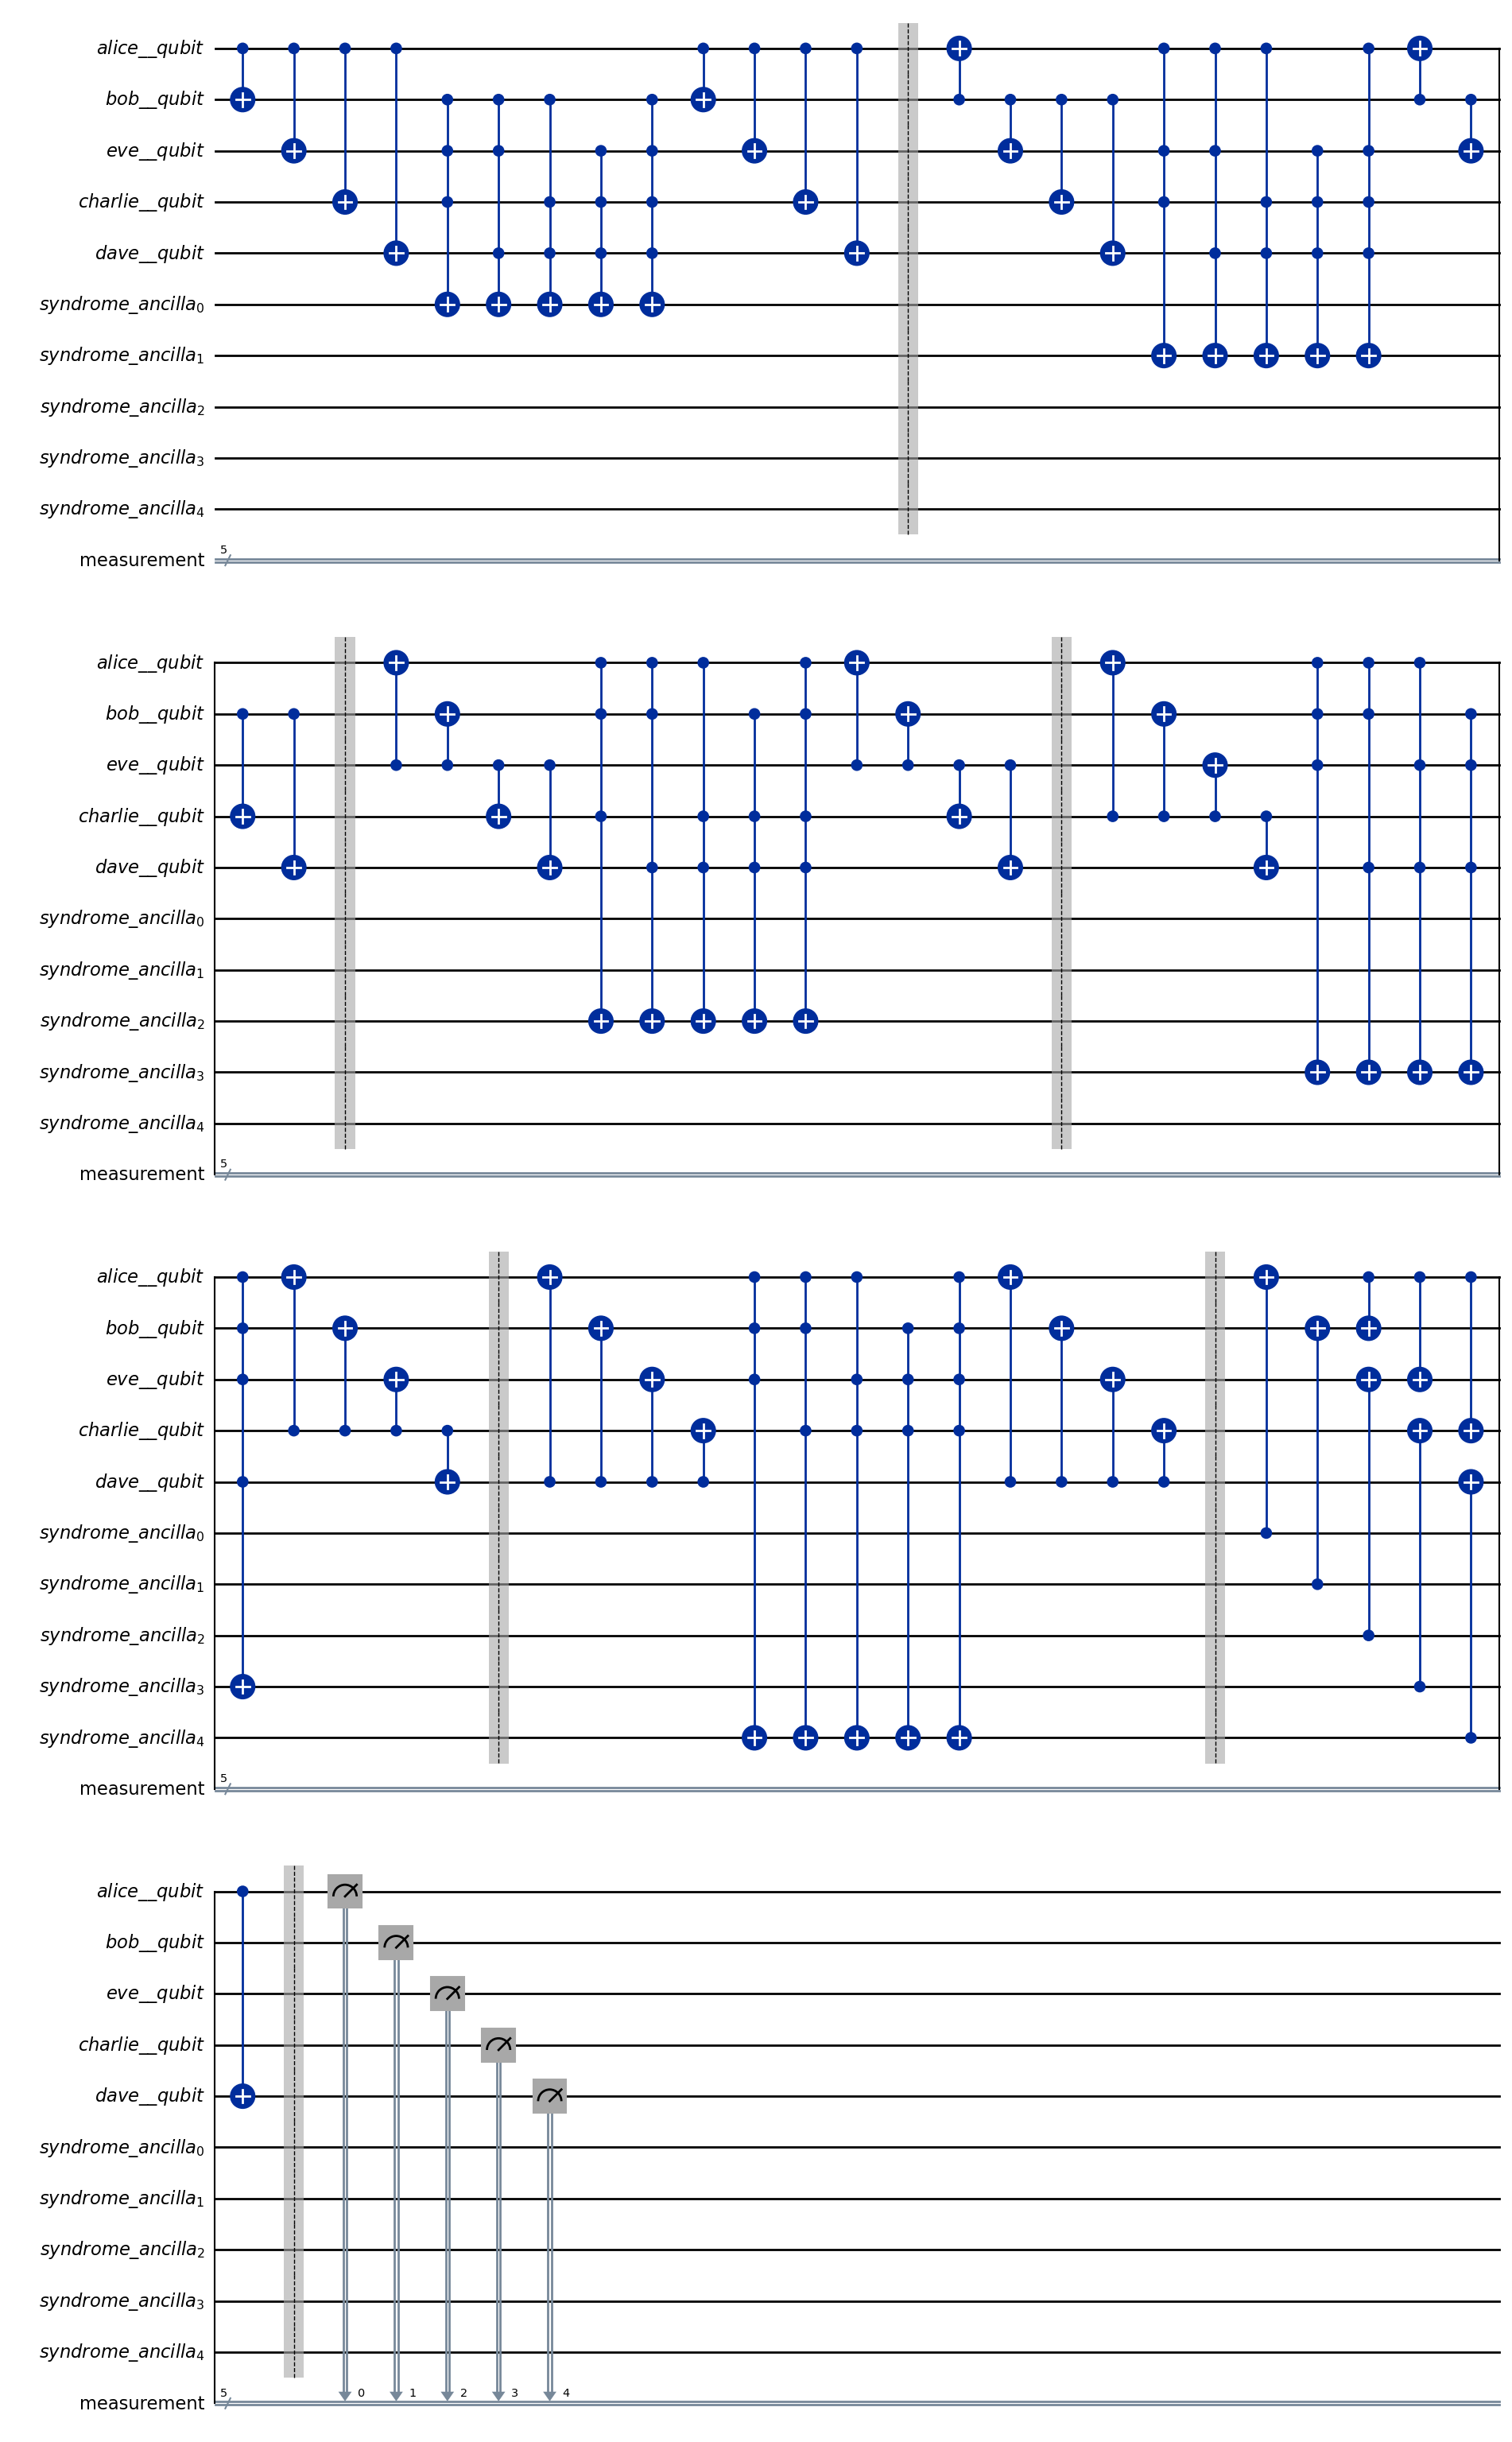

In [21]:
cr= ClassicalRegister(5,"measurement")
alice= QuantumRegister(1, 'alice__qubit')
bob= QuantumRegister(1, 'bob__qubit')
eve= QuantumRegister(1, 'eve__qubit')
charlie= QuantumRegister(1, 'charlie__qubit')
dave= QuantumRegister(1, 'dave__qubit')
aq1= QuantumRegister(2, 'ancilla_qubit_alice')
aq2= QuantumRegister(2,'ancilla_qubit_bob')
aq3= QuantumRegister(2,'ancilla_qubit_eve')
aq4= QuantumRegister(2,'ancilla_qubit_charlie')
aq5= QuantumRegister(2,'ancilla_qubit_dave')
aq6= QuantumRegister(5,'syndrome_ancilla')

decoder_5bit = QuantumCircuit(alice,bob,eve,charlie,dave,aq6,cr)

#decoder_5bit.h(alice)
# decoder_5bit.cx(alice,bob)
# decoder_5bit.cx(alice,eve)
# decoder_5bit.cx(alice,charlie)
# decoder_5bit.cx(alice,dave)

# decoder_5bit.barrier()
# decoder_5bit.cx(alice, aq1)
# decoder_5bit.cx(bob, aq2)
# decoder_5bit.cx(eve, aq3)
# decoder_5bit.cx(charlie, aq4)
# decoder_5bit.cx(dave, aq5)

# decoder_5bit.barrier()

# decoder_5bit.x([2,5,8,13])
# decoder_5bit.barrier()

# decoder_5bit.cx(alice, aq1)
# decoder_5bit.cx(bob, aq2)
# decoder_5bit.cx(eve, aq3)
# decoder_5bit.cx(charlie, aq4)
# decoder_5bit.cx(dave, aq5)

# decoder_5bit.mcx([1,2],0)
# decoder_5bit.mcx([4,5],3)
# decoder_5bit.mcx([7,8],6)
# decoder_5bit.mcx([10,11],9)
# decoder_5bit.mcx([13,14],12)
# decoder_5bit.barrier()

decoder_5bit.cx(alice,bob)
decoder_5bit.cx(alice,eve)
decoder_5bit.cx(alice,charlie)
decoder_5bit.cx(alice,dave)
decoder_5bit.mcx([bob, eve, charlie], aq6[0])
decoder_5bit.mcx([bob, eve, dave], aq6[0])
decoder_5bit.mcx([bob, dave, charlie], aq6[0])
decoder_5bit.mcx([dave, eve, charlie], aq6[0])
decoder_5bit.mcx([bob, eve, charlie, dave], aq6[0])
decoder_5bit.cx(alice,bob)
decoder_5bit.cx(alice,eve)
decoder_5bit.cx(alice,charlie)
decoder_5bit.cx(alice,dave)
decoder_5bit.barrier()

decoder_5bit.cx(bob,alice)
decoder_5bit.cx(bob,eve)
decoder_5bit.cx(bob,charlie)
decoder_5bit.cx(bob,dave)
decoder_5bit.mcx([alice, eve, charlie], aq6[1])
decoder_5bit.mcx([alice, eve, dave], aq6[1])
decoder_5bit.mcx([alice, charlie, dave], aq6[1])
decoder_5bit.mcx([dave, eve, charlie], aq6[1])
decoder_5bit.mcx([alice, eve, charlie,dave], aq6[1])
decoder_5bit.cx(bob,alice)
decoder_5bit.cx(bob,eve)
decoder_5bit.cx(bob,charlie)
decoder_5bit.cx(bob,dave)
decoder_5bit.barrier()

decoder_5bit.cx(eve,alice)
decoder_5bit.cx(eve,bob)
decoder_5bit.cx(eve,charlie)
decoder_5bit.cx(eve,dave)
decoder_5bit.mcx([alice, bob, charlie], aq6[2])
decoder_5bit.mcx([alice, bob, dave], aq6[2])
decoder_5bit.mcx([alice, dave, charlie], aq6[2])
decoder_5bit.mcx([dave, bob, charlie], aq6[2])
decoder_5bit.mcx([alice, bob, charlie, dave], aq6[2])
decoder_5bit.cx(eve,alice)
decoder_5bit.cx(eve,bob)
decoder_5bit.cx(eve,charlie)
decoder_5bit.cx(eve,dave)
decoder_5bit.barrier()

decoder_5bit.cx(charlie,alice)
decoder_5bit.cx(charlie,bob)
decoder_5bit.cx(charlie,eve)
decoder_5bit.cx(charlie,dave)
decoder_5bit.mcx([alice, bob, eve], aq6[3])
decoder_5bit.mcx([alice, bob, dave], aq6[3])
decoder_5bit.mcx([alice, dave, eve], aq6[3])
decoder_5bit.mcx([dave, bob, eve], aq6[3])
decoder_5bit.mcx([alice, bob, eve, dave], aq6[3])
decoder_5bit.cx(charlie,alice)
decoder_5bit.cx(charlie,bob)
decoder_5bit.cx(charlie,eve)
decoder_5bit.cx(charlie,dave)
decoder_5bit.barrier()

decoder_5bit.cx(dave,alice)
decoder_5bit.cx(dave,bob)
decoder_5bit.cx(dave,eve)
decoder_5bit.cx(dave,charlie)
decoder_5bit.mcx([alice, bob, eve], aq6[4])
decoder_5bit.mcx([alice, bob, charlie], aq6[4])
decoder_5bit.mcx([alice, charlie, eve], aq6[4])
decoder_5bit.mcx([charlie, bob, eve], aq6[4])
decoder_5bit.mcx([alice, bob, eve, charlie], aq6[4])
decoder_5bit.cx(dave,alice)
decoder_5bit.cx(dave,bob)
decoder_5bit.cx(dave,eve)
decoder_5bit.cx(dave,charlie)
decoder_5bit.barrier()

decoder_5bit.cx(aq6[0],alice)
decoder_5bit.cx(aq6[1],bob)
decoder_5bit.cx(aq6[2],eve)
decoder_5bit.cx(aq6[3],charlie)
decoder_5bit.cx(aq6[4],dave)
decoder_5bit.cx(alice,bob)
decoder_5bit.cx(alice,eve)
decoder_5bit.cx(alice,charlie)
decoder_5bit.cx(alice,dave)
#decoder_5bit.h(alice)
decoder_5bit.barrier()

decoder_5bit.measure([alice[0], bob[0], eve[0],charlie[0],dave[0]],cr)
decoder_5bit.draw(output='mpl')

In [22]:
decoder_5bit.draw(output='mpl').savefig("Decoder for modified 5bit QRC.pdf",dpi=400,bbox_inches="tight")

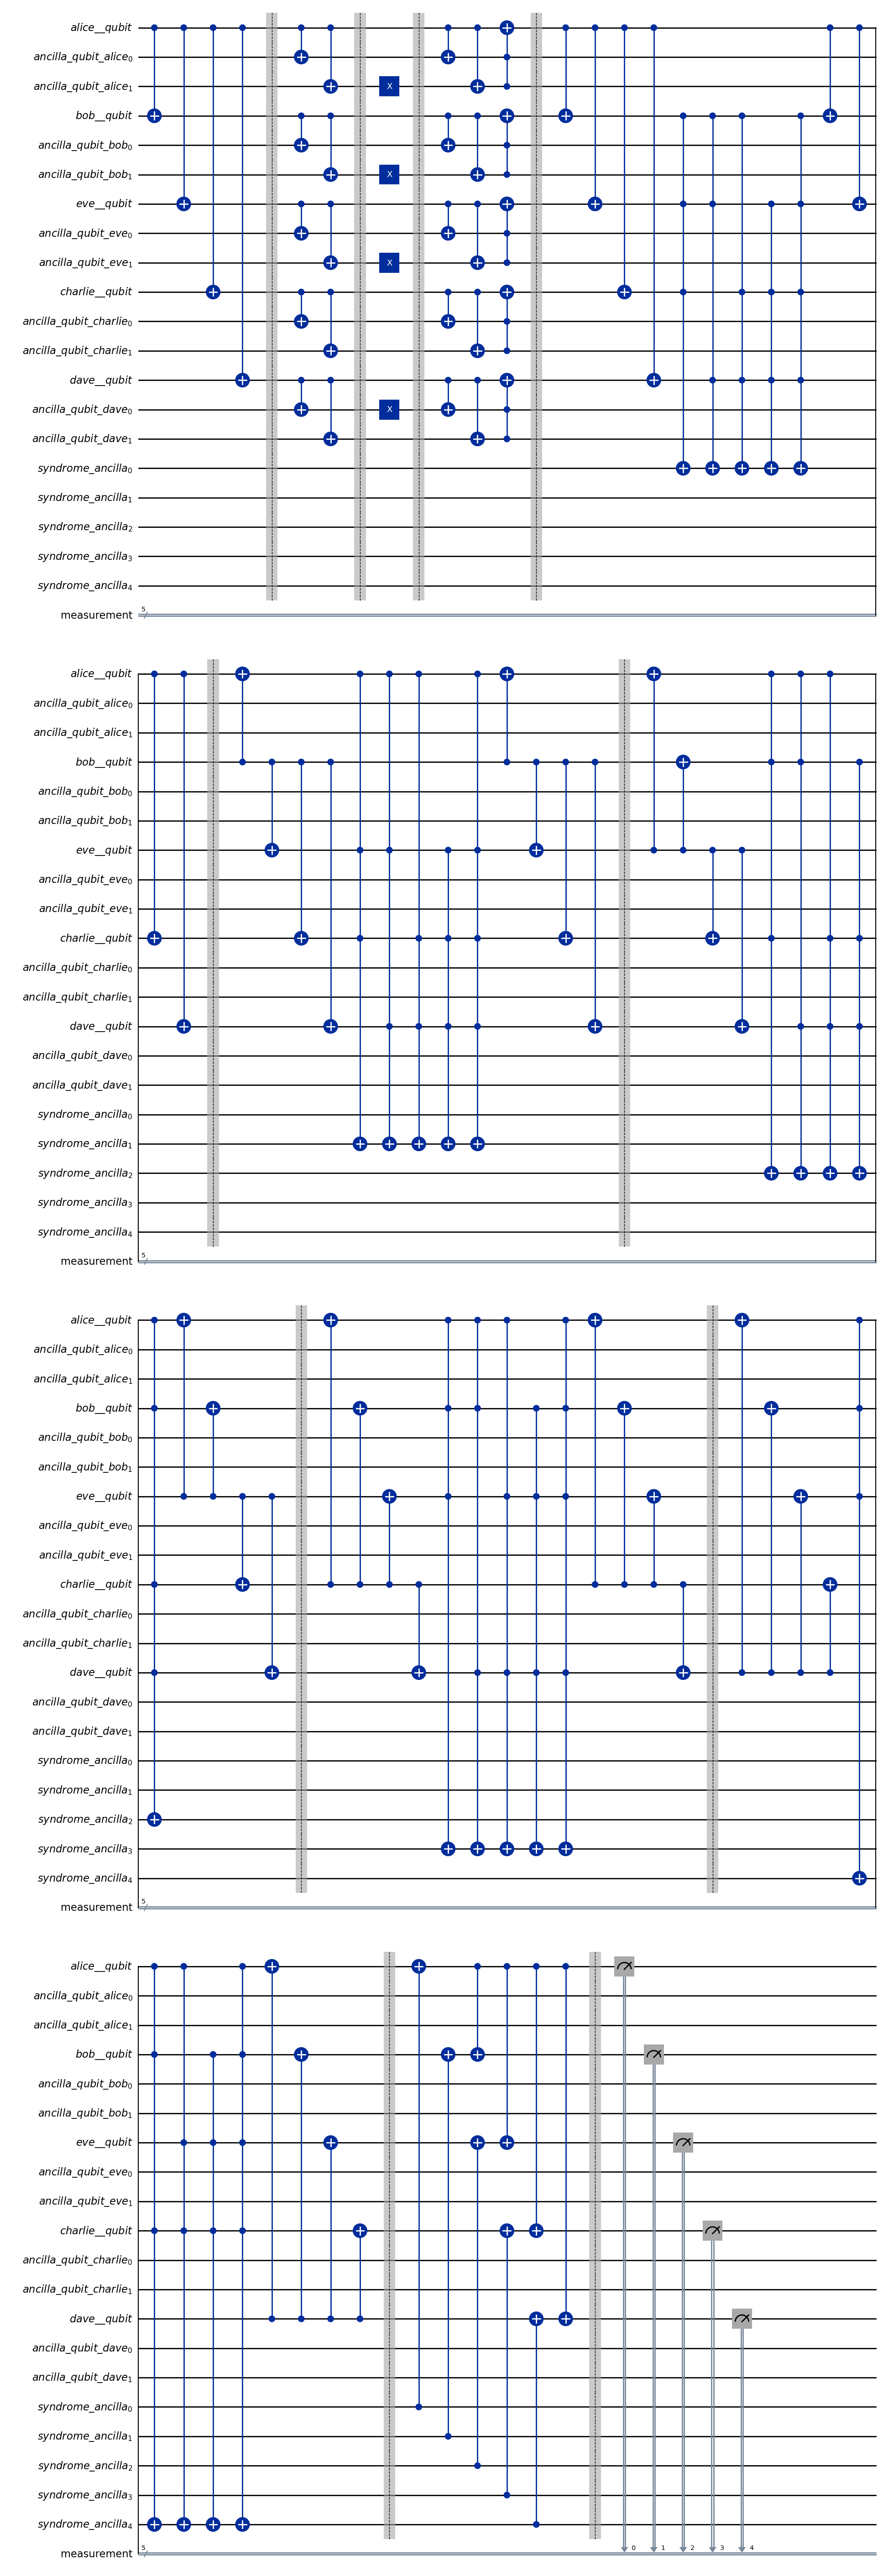

In [4]:
cr= ClassicalRegister(5,"measurement")
alice= QuantumRegister(1, 'alice__qubit')
bob= QuantumRegister(1, 'bob__qubit')
eve= QuantumRegister(1, 'eve__qubit')
charlie= QuantumRegister(1, 'charlie__qubit')
dave= QuantumRegister(1, 'dave__qubit')
aq1= QuantumRegister(2, 'ancilla_qubit_alice')
aq2= QuantumRegister(2,'ancilla_qubit_bob')
aq3= QuantumRegister(2,'ancilla_qubit_eve')
aq4= QuantumRegister(2,'ancilla_qubit_charlie')
aq5= QuantumRegister(2,'ancilla_qubit_dave')
aq6= QuantumRegister(5,'syndrome_ancilla')

threebit_penta = QuantumCircuit(alice,aq1,bob,aq2,eve,aq3,charlie,aq4,dave,aq5,aq6,cr)

#threebit_penta.h(alice)
threebit_penta.cx(alice,bob)
threebit_penta.cx(alice,eve)
threebit_penta.cx(alice,charlie)
threebit_penta.cx(alice,dave)

threebit_penta.barrier()
threebit_penta.cx(alice, aq1)
threebit_penta.cx(bob, aq2)
threebit_penta.cx(eve, aq3)
threebit_penta.cx(charlie, aq4)
threebit_penta.cx(dave, aq5)

threebit_penta.barrier()

threebit_penta.x([2,5,8,13])
threebit_penta.barrier()

threebit_penta.cx(alice, aq1)
threebit_penta.cx(bob, aq2)
threebit_penta.cx(eve, aq3)
threebit_penta.cx(charlie, aq4)
threebit_penta.cx(dave, aq5)

threebit_penta.mcx([1,2],0)
threebit_penta.mcx([4,5],3)
threebit_penta.mcx([7,8],6)
threebit_penta.mcx([10,11],9)
threebit_penta.mcx([13,14],12)
threebit_penta.barrier()

threebit_penta.cx(alice,bob)
threebit_penta.cx(alice,eve)
threebit_penta.cx(alice,charlie)
threebit_penta.cx(alice,dave)
threebit_penta.mcx([bob, eve, charlie], aq6[0])
threebit_penta.mcx([bob, eve, dave], aq6[0])
threebit_penta.mcx([bob, dave, charlie], aq6[0])
threebit_penta.mcx([dave, eve, charlie], aq6[0])
threebit_penta.mcx([bob, eve, charlie, dave], aq6[0])
threebit_penta.cx(alice,bob)
threebit_penta.cx(alice,eve)
threebit_penta.cx(alice,charlie)
threebit_penta.cx(alice,dave)
threebit_penta.barrier()

threebit_penta.cx(bob,alice)
threebit_penta.cx(bob,eve)
threebit_penta.cx(bob,charlie)
threebit_penta.cx(bob,dave)
threebit_penta.mcx([alice, eve, charlie], aq6[1])
threebit_penta.mcx([alice, eve, dave], aq6[1])
threebit_penta.mcx([alice, charlie, dave], aq6[1])
threebit_penta.mcx([dave, eve, charlie], aq6[1])
threebit_penta.mcx([alice, eve, charlie,dave], aq6[1])
threebit_penta.cx(bob,alice)
threebit_penta.cx(bob,eve)
threebit_penta.cx(bob,charlie)
threebit_penta.cx(bob,dave)
threebit_penta.barrier()

threebit_penta.cx(eve,alice)
threebit_penta.cx(eve,bob)
threebit_penta.cx(eve,charlie)
threebit_penta.cx(eve,dave)
threebit_penta.mcx([alice, bob, charlie], aq6[2])
threebit_penta.mcx([alice, bob, dave], aq6[2])
threebit_penta.mcx([alice, dave, charlie], aq6[2])
threebit_penta.mcx([dave, bob, charlie], aq6[2])
threebit_penta.mcx([alice, bob, charlie, dave], aq6[2])
threebit_penta.cx(eve,alice)
threebit_penta.cx(eve,bob)
threebit_penta.cx(eve,charlie)
threebit_penta.cx(eve,dave)
threebit_penta.barrier()

threebit_penta.cx(charlie,alice)
threebit_penta.cx(charlie,bob)
threebit_penta.cx(charlie,eve)
threebit_penta.cx(charlie,dave)
threebit_penta.mcx([alice, bob, eve], aq6[3])
threebit_penta.mcx([alice, bob, dave], aq6[3])
threebit_penta.mcx([alice, dave, eve], aq6[3])
threebit_penta.mcx([dave, bob, eve], aq6[3])
threebit_penta.mcx([alice, bob, eve, dave], aq6[3])
threebit_penta.cx(charlie,alice)
threebit_penta.cx(charlie,bob)
threebit_penta.cx(charlie,eve)
threebit_penta.cx(charlie,dave)
threebit_penta.barrier()

threebit_penta.cx(dave,alice)
threebit_penta.cx(dave,bob)
threebit_penta.cx(dave,eve)
threebit_penta.cx(dave,charlie)
threebit_penta.mcx([alice, bob, eve], aq6[4])
threebit_penta.mcx([alice, bob, charlie], aq6[4])
threebit_penta.mcx([alice, charlie, eve], aq6[4])
threebit_penta.mcx([charlie, bob, eve], aq6[4])
threebit_penta.mcx([alice, bob, eve, charlie], aq6[4])
threebit_penta.cx(dave,alice)
threebit_penta.cx(dave,bob)
threebit_penta.cx(dave,eve)
threebit_penta.cx(dave,charlie)
threebit_penta.barrier()

threebit_penta.cx(aq6[0],alice)
threebit_penta.cx(aq6[1],bob)
threebit_penta.cx(aq6[2],eve)
threebit_penta.cx(aq6[3],charlie)
threebit_penta.cx(aq6[4],dave)
threebit_penta.cx(alice,bob)
threebit_penta.cx(alice,eve)
threebit_penta.cx(alice,charlie)
threebit_penta.cx(alice,dave)
#threebit_penta.h(alice)
threebit_penta.barrier()

threebit_penta.measure([alice[0], bob[0], eve[0],charlie[0],dave[0]],cr)
threebit_penta.draw(output='mpl')

In [5]:
threebit_penta.draw(output='mpl').savefig("3bit repetition on penta state.png",dpi=400,bbox_inches="tight")

In [12]:
!sudo apt update
!sudo apt install texlive-full

E: dpkg was interrupted, you must manually run 'sudo dpkg --configure -a' to correct the problem. 


In [13]:
#!sudo apt-get update
!sudo apt-get install -y texlive texlive-latex-extra texlive-fonts-recommended texlive-xetex dvipng cm-super

E: dpkg was interrupted, you must manually run 'sudo dpkg --configure -a' to correct the problem. 


In [14]:
!sudo dpkg --configure -a

Setting up context (2021.03.05.20220211-1) ...
Running mtxrun --generate. This may take some time... done.
Pregenerating ConTeXt MarkIV format. This may take some time... ^C


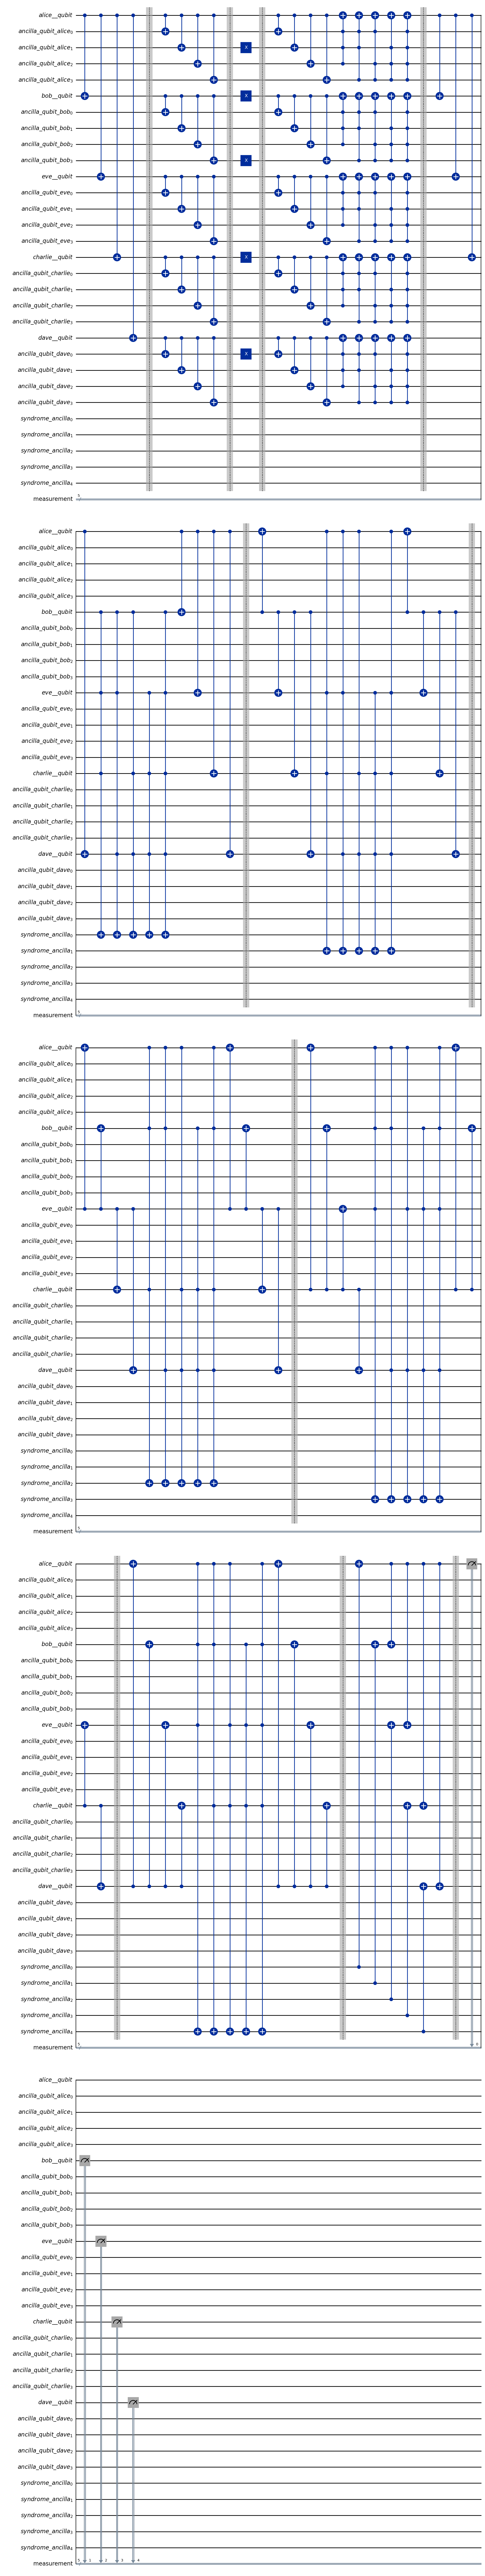

In [23]:
cr= ClassicalRegister(5,"measurement")
alice= QuantumRegister(1, 'alice__qubit')
bob= QuantumRegister(1, 'bob__qubit')
eve= QuantumRegister(1, 'eve__qubit')
charlie= QuantumRegister(1, 'charlie__qubit')
dave= QuantumRegister(1, 'dave__qubit')
aq1= QuantumRegister(4, 'ancilla_qubit_alice')
aq2= QuantumRegister(4,'ancilla_qubit_bob')
aq3= QuantumRegister(4,'ancilla_qubit_eve')
aq4= QuantumRegister(4,'ancilla_qubit_charlie')
aq5= QuantumRegister(4,'ancilla_qubit_dave')
aq6= QuantumRegister(5,'syndrome_ancilla')

fivebit_penta = QuantumCircuit(alice,aq1,bob,aq2,eve,aq3,charlie,aq4,dave,aq5,aq6,cr)

#fivebit_penta.h(alice)
fivebit_penta.cx(alice,bob)
fivebit_penta.cx(alice,eve)
fivebit_penta.cx(alice,charlie)
fivebit_penta.cx(alice,dave)

fivebit_penta.barrier()
fivebit_penta.cx(alice, aq1)
fivebit_penta.cx(bob, aq2)
fivebit_penta.cx(eve, aq3)
fivebit_penta.cx(charlie, aq4)
fivebit_penta.cx(dave, aq5)

fivebit_penta.barrier()

fivebit_penta.x([2,5,9,15,21])
fivebit_penta.barrier()

fivebit_penta.cx(alice, aq1)
fivebit_penta.cx(bob, aq2)
fivebit_penta.cx(eve, aq3)
fivebit_penta.cx(charlie, aq4)
fivebit_penta.cx(dave, aq5)

fivebit_penta.mcx([1,2,3],0)
fivebit_penta.mcx([1,2,4],0)
fivebit_penta.mcx([1,3,4],0)
fivebit_penta.mcx([2,3,4],0)
fivebit_penta.mcx([1,2,3,4],0)
fivebit_penta.mcx([6,7,8],5)
fivebit_penta.mcx([6,7,9],5)
fivebit_penta.mcx([6,8,9],5)
fivebit_penta.mcx([7,8,9],5)
fivebit_penta.mcx([6,7,8,9],5)
fivebit_penta.mcx([11,12,13],10)
fivebit_penta.mcx([11,12,14],10)
fivebit_penta.mcx([11,13,14],10)
fivebit_penta.mcx([12,13,14],10)
fivebit_penta.mcx([11,12,13,14],10)
fivebit_penta.mcx([16,17,18],15)
fivebit_penta.mcx([16,17,19],15)
fivebit_penta.mcx([16,18,19],15)
fivebit_penta.mcx([17,18,19],15)
fivebit_penta.mcx([16,17,18,19],15)
fivebit_penta.mcx([21,22,23],20)
fivebit_penta.mcx([21,22,24],20)
fivebit_penta.mcx([21,23,24],20)
fivebit_penta.mcx([22,23,24],20)
fivebit_penta.mcx([21,22,23,24],20)
fivebit_penta.barrier()

fivebit_penta.cx(alice,bob)
fivebit_penta.cx(alice,eve)
fivebit_penta.cx(alice,charlie)
fivebit_penta.cx(alice,dave)
fivebit_penta.mcx([bob, eve, charlie], aq6[0])
fivebit_penta.mcx([bob, eve, dave], aq6[0])
fivebit_penta.mcx([bob, dave, charlie], aq6[0])
fivebit_penta.mcx([dave, eve, charlie], aq6[0])
fivebit_penta.mcx([bob, eve, charlie, dave], aq6[0])
fivebit_penta.cx(alice,bob)
fivebit_penta.cx(alice,eve)
fivebit_penta.cx(alice,charlie)
fivebit_penta.cx(alice,dave)
fivebit_penta.barrier()

fivebit_penta.cx(bob,alice)
fivebit_penta.cx(bob,eve)
fivebit_penta.cx(bob,charlie)
fivebit_penta.cx(bob,dave)
fivebit_penta.mcx([alice, eve, charlie], aq6[1])
fivebit_penta.mcx([alice, eve, dave], aq6[1])
fivebit_penta.mcx([alice, charlie, dave], aq6[1])
fivebit_penta.mcx([dave, eve, charlie], aq6[1])
fivebit_penta.mcx([alice, eve, charlie,dave], aq6[1])
fivebit_penta.cx(bob,alice)
fivebit_penta.cx(bob,eve)
fivebit_penta.cx(bob,charlie)
fivebit_penta.cx(bob,dave)
fivebit_penta.barrier()

fivebit_penta.cx(eve,alice)
fivebit_penta.cx(eve,bob)
fivebit_penta.cx(eve,charlie)
fivebit_penta.cx(eve,dave)
fivebit_penta.mcx([alice, bob, charlie], aq6[2])
fivebit_penta.mcx([alice, bob, dave], aq6[2])
fivebit_penta.mcx([alice, dave, charlie], aq6[2])
fivebit_penta.mcx([dave, bob, charlie], aq6[2])
fivebit_penta.mcx([alice, bob, charlie, dave], aq6[2])
fivebit_penta.cx(eve,alice)
fivebit_penta.cx(eve,bob)
fivebit_penta.cx(eve,charlie)
fivebit_penta.cx(eve,dave)
fivebit_penta.barrier()

fivebit_penta.cx(charlie,alice)
fivebit_penta.cx(charlie,bob)
fivebit_penta.cx(charlie,eve)
fivebit_penta.cx(charlie,dave)
fivebit_penta.mcx([alice, bob, eve], aq6[3])
fivebit_penta.mcx([alice, bob, dave], aq6[3])
fivebit_penta.mcx([alice, dave, eve], aq6[3])
fivebit_penta.mcx([dave, bob, eve], aq6[3])
fivebit_penta.mcx([alice, bob, eve, dave], aq6[3])
fivebit_penta.cx(charlie,alice)
fivebit_penta.cx(charlie,bob)
fivebit_penta.cx(charlie,eve)
fivebit_penta.cx(charlie,dave)
fivebit_penta.barrier()

fivebit_penta.cx(dave,alice)
fivebit_penta.cx(dave,bob)
fivebit_penta.cx(dave,eve)
fivebit_penta.cx(dave,charlie)
fivebit_penta.mcx([alice, bob, eve], aq6[4])
fivebit_penta.mcx([alice, bob, charlie], aq6[4])
fivebit_penta.mcx([alice, charlie, eve], aq6[4])
fivebit_penta.mcx([charlie, bob, eve], aq6[4])
fivebit_penta.mcx([alice, bob, eve, charlie], aq6[4])
fivebit_penta.cx(dave,alice)
fivebit_penta.cx(dave,bob)
fivebit_penta.cx(dave,eve)
fivebit_penta.cx(dave,charlie)
fivebit_penta.barrier()

fivebit_penta.cx(aq6[0],alice)
fivebit_penta.cx(aq6[1],bob)
fivebit_penta.cx(aq6[2],eve)
fivebit_penta.cx(aq6[3],charlie)
fivebit_penta.cx(aq6[4],dave)
fivebit_penta.cx(alice,bob)
fivebit_penta.cx(alice,eve)
fivebit_penta.cx(alice,charlie)
fivebit_penta.cx(alice,dave)
#fivebit_penta.h(alice)
fivebit_penta.barrier()

fivebit_penta.measure([alice[0], bob[0], eve[0],charlie[0],dave[0]],cr)
fivebit_penta.draw(output='mpl')
#circuit_drawer(fivebit_penta, output="latex", filename="circuit.tex")

In [25]:
fivebit_penta.draw(output='mpl').savefig("5bit repetition on penta state.png",dpi=200,bbox_inches="tight")